In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats as ss
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
#import statsmodels.api as sm # What does this do? Find out and type here.
#from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix as confusion_matrix
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
plt.style.use("ggplot")
import warnings; warnings.simplefilter('ignore')
from sklearn.linear_model import LogisticRegressionCV
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict


import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# Load the data. 
white_wine = pd.read_csv('winequality-white.csv', sep=",")
red_wine = pd.read_csv('winequality-red.csv', sep=",")

In [3]:
red_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


[Text(0.5, 1.0, 'Red wine')]

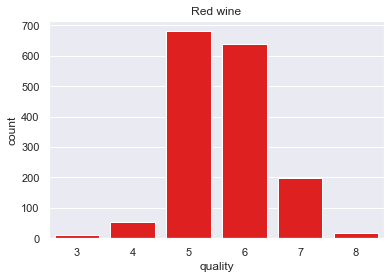

In [4]:
sns.countplot(data=red_wine, x="quality", color = 'red').set(title= "Red wine")

In [5]:
red_wine["quality"].value_counts(dropna=False, sort=True)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
ratings = [
    (red_wine['quality'] >= 7),
    (red_wine['quality'] <= 4)
]
quality = ['good', 'bad']
red_wine['quality'] = np.select(ratings, quality, default='average')
red_wine.quality.value_counts()

average    1319
good        217
bad          63
Name: quality, dtype: int64

In [7]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,average
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,average
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,average
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,average
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,average


In [8]:

dfo=red_wine.select_dtypes(include=['object']) # select object type columns
red_wine = pd.concat([red_wine.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

In [9]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_average,quality_bad,quality_good
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,0,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,0,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,0,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1,0,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,0,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,0,0


In [10]:
# We do the test train split here
X = red_wine.drop(["quality_good", "quality_bad", "quality_average"], axis = 1)
y = red_wine['quality_good']

In [11]:
y.value_counts()

0    1382
1     217
Name: quality_good, dtype: int64

# Test Train Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022, stratify=y)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [15]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)

In [16]:
y.shape

(2764,)

In [17]:
X.shape

(2764, 11)

In [18]:
from sklearn.dummy import DummyClassifier
red_dummy_classifier = DummyClassifier(strategy='most_frequent',random_state=2022)
red_dummy_classifier.fit(X_train,y_train)
red_dummy_score = red_dummy_classifier.score(X_test,y_test)
print("Dummy Score = ", red_dummy_score)

Dummy Score =  0.8645833333333334


                         score
alcohol               0.161003
sulphates             0.127658
volatile acidity      0.105209
density               0.094045
citric acid           0.081759
total sulfur dioxide  0.078044
fixed acidity         0.077792
chlorides             0.075135
residual sugar        0.069594
pH                    0.067585
free sulfur dioxide   0.062177


Text(0.5, 1.0, 'Model Feature Importance RF for Red Wine')

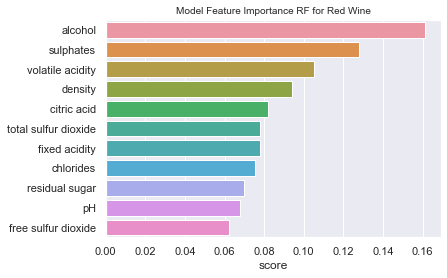

In [19]:
model_feature_importance = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train).feature_importances_
feature_scores = pd.DataFrame({'score':model_feature_importance}, index=list(X.columns)).sort_values('score', ascending = False)
print(feature_scores)
sns.barplot(feature_scores['score'], feature_scores.index)
plt.title("Model Feature Importance RF for Red Wine", fontsize =10)

In [20]:


model=RandomForestClassifier()
 
model.fit(X,y)
 
feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':model.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
10,alcohol,0.237892
9,sulphates,0.157905
1,volatile acidity,0.132216
6,total sulfur dioxide,0.074267
2,citric acid,0.070683
7,density,0.066334
0,fixed acidity,0.061077
4,chlorides,0.055660
3,residual sugar,0.049304
5,free sulfur dioxide,0.047699


In [21]:
# Model selection and model tuning
# Function for executing classifier algorithms, outputing performance metrics and the best hyperparameters for each classifier
import numpy as np
from sklearn.metrics import accuracy_score

def evaluate_model(X_test, y_test, clf, parameters):
    
    print("Name of classifier: ",clf)
    
    # Instantiate an instance of GridsearchCV
    grid = GridSearchCV(clf, parameters, n_jobs = -1, scoring = 'roc_auc')
    
    # Fit the gridsearch model to the training splits - the DTM/sparse array and the target 
    grid_search = grid.fit(X_train, y_train)
    
    # Make predictions for X_test DTM/sparse array based on the best parameters.The refitted GridSearchCV estimator...
    #....is made available as the best_estimator_ attribute and permits using predict ...
    #...directly on this GridSearchCV instance. Predict produces binary classifications predictions 
    y_pred = grid_search.predict(X_test)
    
    
    # Create a confusion matrix comparing the test target values with the predicted values
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    # Print the best score based on the scoring method, in this case 'roc_auc'
    # Mean cross-validated score of the best_estimator
    print("Best ROC AUC score:", grid_search.best_score_) 
    
    # Print a classification report for the best model
    print(classification_report(y_test, y_pred))
    print('\nConfusion Matrix:\n', cm)

    # Print the best parameters identified by gridsearching
    print("Best Parameters:", grid_search.best_params_)
    
    # Cross Validation Score
    cv_score = (cross_val_score(clf, X_test, y_test, cv=5).mean())*100
    print("\nCross Validation Score:\n", cv_score)
    
    # Result of accuracy minus cv scores
    # Accuracy Score
    acc_score = (accuracy_score(y_test, y_pred))*100
    print("Accuracy Score:", acc_score)
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is\n", result)
    
# Reference: https://github.com/sdesaidata/Springboard/blob/master/Capstone2_TweetsandMusic_Predictor/5__MachineLearning.ipynb
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    

In [22]:
# Classifier algorithms for testing and their respective hyperparameter search grids
# Commented-out the search grid for random forest classisfier due to long processing time

# Algorithms to compare
LR = LogisticRegression()
KNN = KNeighborsClassifier()
RF = RandomForestClassifier()

# Search grids for classifier-specific parameters
algos_params ={LR:{'C': [0.001, 0.1, 1, 10, 100]},
              KNN:{'weights':['distance','uniform'],'n_neighbors':range(1,50)},
              RF:{'n_estimators': [100, 300, 500], # comment out RF due to long processing time (~ 3 hours)
               'max_depth': [10,15,20,25], # comment out RF due to long processing time (~ 3 hours)
                'max_features': [3],
              'min_samples_split': [2, 5, 10, 15, 100], # comment out RF due to long processing time (~ 3 hours)
              'min_samples_leaf': [1, 2, 5, 10]}} # comment out RF due to long processing time (~ 3 hours)

In [23]:
for k, v in algos_params.items():evaluate_model(X_test, y_test, k, v)

Name of classifier:  LogisticRegression()
Best ROC AUC score: 0.864885514685653
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       415
           1       0.64      0.25      0.36        65

    accuracy                           0.88       480
   macro avg       0.77      0.61      0.64       480
weighted avg       0.86      0.88      0.86       480


Confusion Matrix:
 [[406   9]
 [ 49  16]]
Best Parameters: {'C': 0.1}

Cross Validation Score:
 88.125
Accuracy Score: 87.91666666666667

Accuracy Score - Cross Validation Score is
 -0.2083333333333286
Name of classifier:  KNeighborsClassifier()
Best ROC AUC score: 0.9087401934346628
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       415
           1       0.68      0.26      0.38        65

    accuracy                           0.88       480
   macro avg       0.79      0.62      0.66       480
weighted avg       0.87      0.88  

In [25]:
LR = LogisticRegression(C = 0.1)
LR.fit(X_train, y_train)
LR_probs = LR.predict_proba(X_test)
LR_probs = LR_probs[:, 1]
LR_fpr, LR_tpr, LR_thresholds = roc_curve(y_test, LR_probs)
LR_auc = roc_auc_score(y_test, LR_probs)
print('Logistic Regression AUC: %.4f' % LR_auc)

KNN = KNeighborsClassifier(n_neighbors= 44, weights='distance')
KNN.fit(X_train, y_train)
KNN_probs = KNN.predict_proba(X_test)
KNN_probs = KNN_probs[:, 1]
KNN_fpr, KNN_tpr, KNN_thresholds = roc_curve(y_test, KNN_probs)
KNN_auc = roc_auc_score(y_test,KNN_probs)
print('K Nearest Neighbor AUC: %.4f' % KNN_auc)

RF = RandomForestClassifier(max_depth=2015, max_features= 3, min_samples_leaf=1, min_samples_split= 2, n_estimators=300)
RF.fit(X_train, y_train)
RF_probs = RF.predict_proba(X_test)
RF_probs = RF_probs[:, 1]
RF_fpr, RF_tpr, RF_thresholds = roc_curve(y_test, RF_probs)
RF_auc = roc_auc_score(y_test, RF_probs)
print('Random Forest Classifier AUC: %.4f' % RF_auc)



Logistic Regression AUC: 0.8919
K Nearest Neighbor AUC: 0.9069
Random Forest Classifier AUC: 0.9179


In [26]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    RF = RandomForestClassifier()
    param_grid = {'n_estimators': [100, 300, 500], # comment out RF due to long processing time (~ 3 hours)
               'max_depth': [10,15,20,25], # comment out RF due to long processing time (~ 3 hours)
                'max_features': [3],
              'min_samples_split': [2, 5, 10, 15, 100], # comment out RF due to long processing time (~ 3 hours)
              'min_samples_leaf': [1, 2, 5, 10]}
    grid_search = GridSearchCV(RF, param_grid, scoring=scorers, refit=refit_score,
                            return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [27]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)}
grid_search_clf = grid_search_wrapper(refit_score='precision_score')

Best params for precision_score
{'max_depth': 20, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for precision_score on the test data:
     pred_neg  pred_pos
neg       407         8
pos        46        19


In [28]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score',
         'param_max_depth', 'param_max_features', 'param_min_samples_split',
         'param_n_estimators']].head()
# Reference: # https://www.kaggle.com/code/kevinarvai/fine-tuning-a-classifier-in-scikit-learn/notebook

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators
171,0.781010,0.203226,0.883828,20,3,10,100
51,0.780606,0.203441,0.882940,10,3,10,100
0,0.765009,0.433763,0.905281,10,3,2,100
120,0.760663,0.480645,0.909761,20,3,2,100
122,0.758974,0.447527,0.906182,20,3,2,500


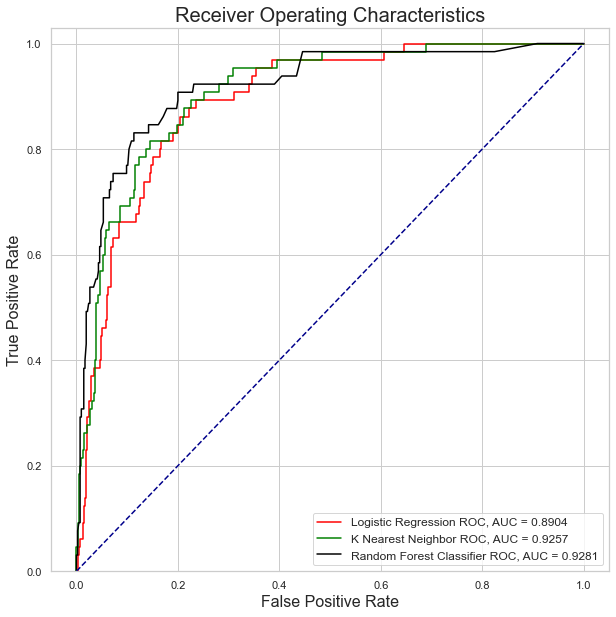

In [29]:
# Plot the roc curves for each classifier using their best hyperparameters

sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
plt.plot(LR_fpr, LR_tpr, color='red', label='Logistic Regression ROC, AUC = 0.8904')
plt.plot(KNN_fpr, KNN_tpr, color='green', label='K Nearest Neighbor ROC, AUC = 0.9257')
plt.plot(RF_fpr, RF_tpr, color='black', label='Random Forest Classifier ROC, AUC = 0.9281')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.title("Receiver Operating Characteristics", fontsize = 20)
plt.legend(loc='best', fontsize  = 12)
plt.xlabel("False Positive Rate", fontsize = 16)
plt.ylabel("True Positive Rate", fontsize = 16)
plt.ylim(0,1.03)
plt.savefig('capstone2_roc_auc.png')

# Reference: # https://stackabuse.com/understanding-roc-curves-with-python/


# Classification Metrics for the Random Forest Model of the Red Wine Data for Predicting Between High Quality and Low Quality Wines


In [30]:
# Use the best model - Random Forest(max_depth= 25, max_features= 3, min_samples_leaf=1, min_samples_split= 2, n_estimators=300) to make classification predictions from the test features for the sarcasm data

# Predict binary classifications for each red wine in the test features
RF_y_pred_binary = RF.predict(X_test)

# Create probabilities of each red wine being "good"
RF_y_pred = RF.predict_proba(X_test)[:,1]

In [31]:
# Metrics for the best model - Random Forest(max_depth= 20, max_features= 5, min_samples_leaf=1, min_samples_split= 2, n_estimators=500) to make classification predictions from the test features for the sarcasm data

# Accuracy
print('Accuracy: %.3f' % accuracy_score(y_true= y_test, y_pred = RF_y_pred_binary))
# Precision
print('Precision: %.3f' % precision_score(y_true= y_test, y_pred = RF_y_pred_binary))
# Recall
print('Recall: %.3f' % recall_score(y_true= y_test, y_pred = RF_y_pred_binary))
# F1 score
print('F1 Score: %.3f' % f1_score(y_true= y_test, y_pred = RF_y_pred_binary))

Accuracy: 0.912
Precision: 0.767
Recall: 0.508
F1 Score: 0.611


In [33]:
# Generate performance metrics using a classification report for the Random forest classifier for the red wine data

report_RF = classification_report(y_test, RF_y_pred_binary,output_dict=True)
# Convert the classification report dictionary into a DF
RF_df = pd.DataFrame(report_RF)
RF_df

# Reference: https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

,0,1,accuracy,macro avg,weighted avg
precision,0.926773,0.767442,0.9125,0.847108,0.905197
recall,0.975904,0.507692,0.9125,0.741798,0.912500
f1-score,0.950704,0.611111,0.9125,0.780908,0.904718
support,415.000000,65.000000,0.9125,480.000000,480.000000


In [30]:
# Convert the DF with the classification report 'RF_df' for Random Forest into an excel spreadsheet for easier integration into the report

RF_df.to_excel("rf_class_report2.xlsx")

In [35]:
# Calculate the f1 scores for the best model, Random Forest

RF_y_pred_binary = RF.predict(X_test)

print("f1 score, macro average:",round(f1_score(y_test, RF_y_pred_binary, average='macro'),4))
print("f1 score, micro average:",round(f1_score(y_test, RF_y_pred_binary, average='micro'),4))
print("f1 score, weighted average:",round(f1_score(y_test, RF_y_pred_binary, average='weighted'),4))

f1 score, macro average: 0.7809
f1 score, micro average: 0.9125
f1 score, weighted average: 0.9047


In [36]:
# Calculate f-beta scores for the best model,Random Forest with beta = 0.5

# The beta parameter determines the weight of recall in the combined score. With beta = 1, f1 and f-beta are equivalent. The beta ...
#...parameter determines the weight of recall in the combined score. beta < 1 lends more weight to precision, while beta > 1 favors...
#...recall (beta -> 0 considers only precision, beta -> +inf only recall).

print("f-beta score, macro average:",round(fbeta_score(y_test, RF_y_pred_binary, average='macro',beta=0.5),4))
print("f-beta, micro average:",round(fbeta_score(y_test, RF_y_pred_binary, average='micro',beta = 0.5),4))
print("f-beta, weighted average:",round(fbeta_score(y_test, RF_y_pred_binary, average='weighted',beta =0.5),4))

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html#sklearn.metrics.fbeta_score

f-beta score, macro average: 0.8162
f-beta, micro average: 0.9125
f-beta, weighted average: 0.9037


In [37]:
# Adjust the classification based on the prediction threshold

def adjusted_classes(RF_y_pred, t):
    
    return [1 if y >= t else 0 for y in RF_y_pred]

# Reference: https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
# Reference: https://github.com/sdesaidata/Springboard/blob/master/Capstone1_Beer_Rating_Predictor/MachineLearning.ipynb

In [38]:
# Classification report for the best-performing model - Random Forest with the ...
#...standard threshold (t = 0.5) into a DF

report_t5 = classification_report(y_test, adjusted_classes(RF_y_pred, t=0.5),output_dict=True)
df = pd.DataFrame(report_t5)
df.columns = ['Low Quality', 'High Quality', 'accuracy', 'macro avg', 'weighted avg']
df
# Reference: https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

,Low Quality,High Quality,accuracy,macro avg,weighted avg
precision,0.926773,0.767442,0.9125,0.847108,0.905197
recall,0.975904,0.507692,0.9125,0.741798,0.912500
f1-score,0.950704,0.611111,0.9125,0.780908,0.904718
support,415.000000,65.000000,0.9125,480.000000,480.000000


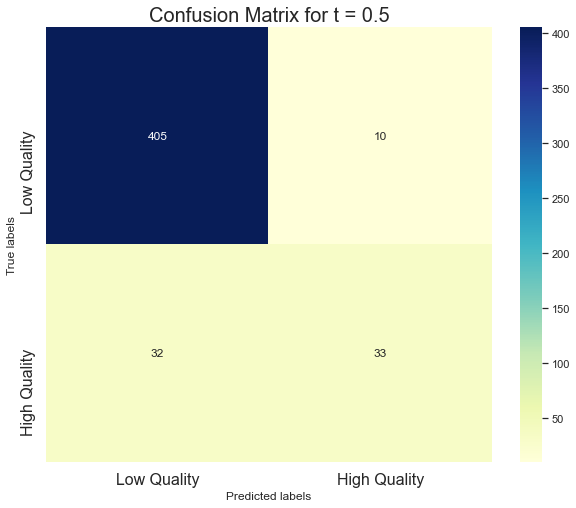

In [41]:
# Confusion matrix figure for the best-performing model - Random Forest with the ...
#...standard threshold (t = 0.5)     

matrix_t5 = confusion_matrix(y_test, adjusted_classes(RF_y_pred, t=0.5),labels=[0, 1]) # include the labels parameter produce a confusion matrix from the perpective of the sarcatsic class

plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(matrix_t5, annot=True, ax = ax, fmt='g',cmap = 'YlGnBu'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix for t = 0.5', fontsize = 20) 
ax.xaxis.set_ticklabels(['Low Quality', 'High Quality'], fontsize = 16) 
ax.yaxis.set_ticklabels(['Low Quality', 'High Quality'], fontsize = 16)
plt.savefig('cm_t5.png')

# Reference (sns heatmap): https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# Reference (sns heatmap): https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

In [42]:
TP = matrix_t5[0][0]
TN = matrix_t5[1][1]
FN = matrix_t5[0][1]
FP = matrix_t5[1][0]

print("(Total) True Negative       :", TN)
print("(Total) True Positive       :", TP)
print("(Total) False Positive   :", FP)
print("(Total) False Negative   :", FN)

(Total) True Negative       : 33
(Total) True Positive       : 405
(Total) False Positive   : 32
(Total) False Negative   : 10


# Threshold Analysis for the Random Forest Model - Exploring the Relationship Between Precision, Recall and Threshold Values



In [43]:
# Make binary or continuous predictions based on the best Random Forest model

# Make binary predictions based on the best Random Forest model
RF_y_pred_binary = RF.predict(X_test)

# Make a prediction on a continuous probability scale based on the best Random Forest model
RF_y_pred = RF.predict_proba(X_test)[:,1]

In [44]:
# Return evenly spaced array of values for testing classification metrics values at different thresholds

thresholds=np.arange(0,1,.01)

# Reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html

In [45]:
# Adjust the classification based on the prediction threshold

def adjusted_classes(RF_y_pred, t):
    
    return [1 if y >= t else 0 for y in RF_y_pred]

# Reference: https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
# Reference: https://github.com/sdesaidata/Springboard/blob/master/Capstone1_Beer_Rating_Predictor/MachineLearning.ipynb

In [46]:
# Plot the precison recall curve and show the current value for each metric by identifying the classifier's threshold

def precision_recall_threshold(p, r, thresholds, t=0.5):
       
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(RF_y_pred, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    sns.set(style="whitegrid")
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0, 1.01]);
    plt.xlim([0, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

# Reference: https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65

In [47]:
# Generate precision-recall curves best on the test target data and the matching predicted probabilities ...
#... generated using the best model

p, r, thresholds = precision_recall_curve(y_test, RF_y_pred)

     pred_neg  pred_pos
neg       405        10
pos        32        33


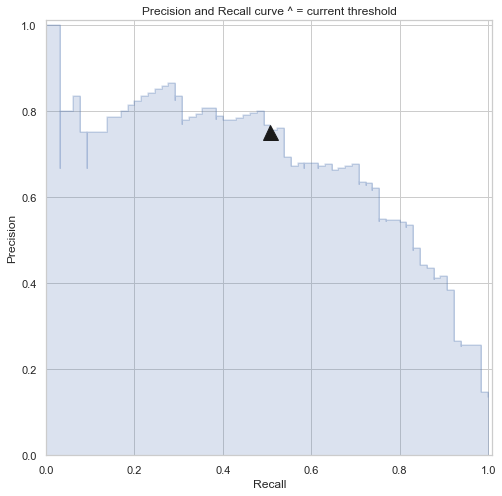

In [48]:
# Plot the precision-recall curve of the logistic regression model for the sarcasm data for the threshold = 0.5

precision_recall_threshold(p, r, thresholds, t=0.5)

     pred_neg  pred_pos
neg       404        11
pos        32        33


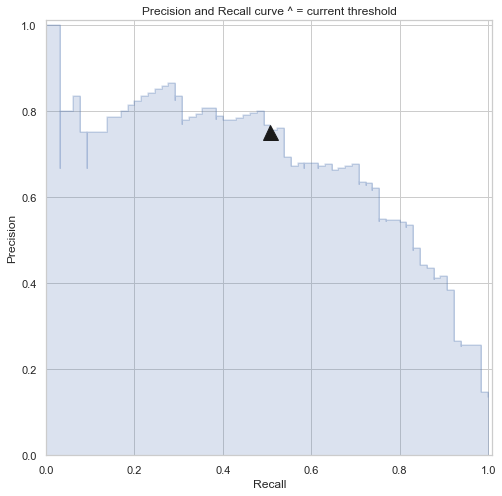

In [49]:
precision_recall_threshold(p, r, thresholds, t=0.49)

     pred_neg  pred_pos
neg       404        11
pos        30        35


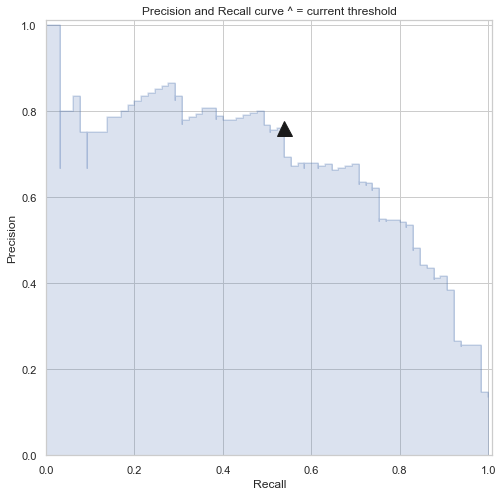

In [50]:
precision_recall_threshold(p, r, thresholds, t=0.48)

     pred_neg  pred_pos
neg       398        17
pos        29        36


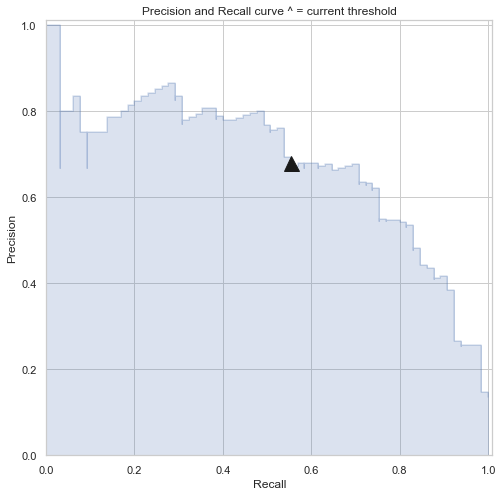

In [51]:
precision_recall_threshold(p, r, thresholds, t=0.45)

     pred_neg  pred_pos
neg       409         6
pos        45        20


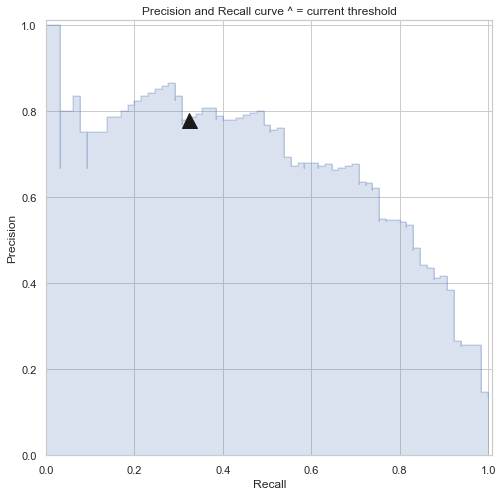

In [52]:
precision_recall_threshold(p, r, thresholds, t=0.6)


     pred_neg  pred_pos
neg       412         3
pos        52        13


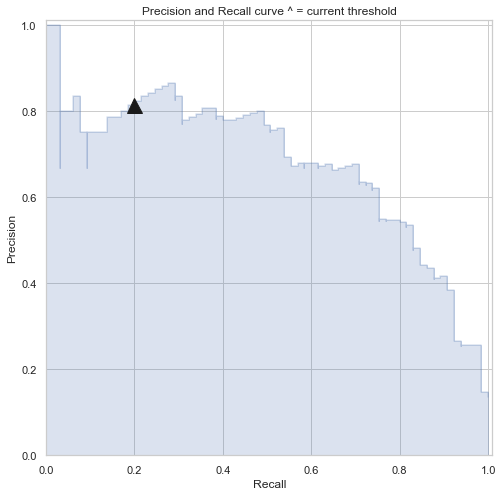

In [53]:
precision_recall_threshold(p, r, thresholds, t=0.7)


     pred_neg  pred_pos
neg       414         1
pos        60         5


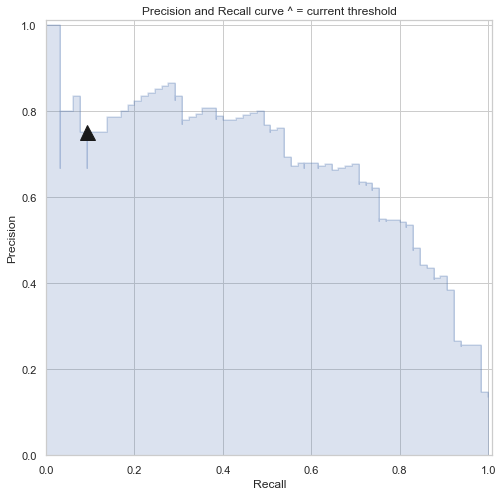

In [54]:
precision_recall_threshold(p, r, thresholds, t=0.75)


     pred_neg  pred_pos
neg       414         1
pos        60         5


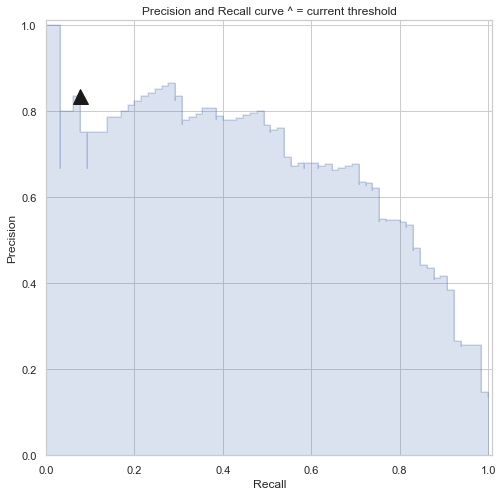

In [55]:
precision_recall_threshold(p, r, thresholds, t=0.76)


     pred_neg  pred_pos
neg       412         3
pos        56         9


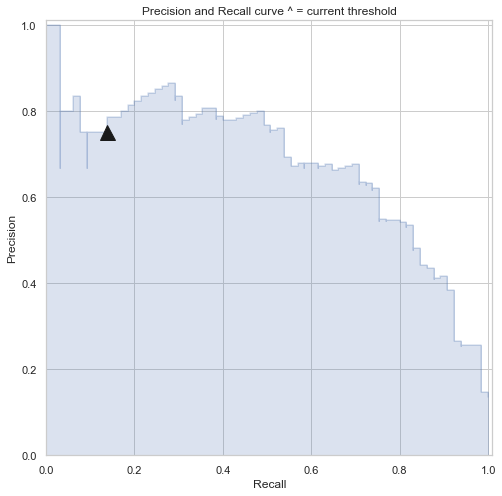

In [65]:
precision_recall_threshold(p, r, thresholds, t=0.72)


     pred_neg  pred_pos
neg       414         1
pos        61         4


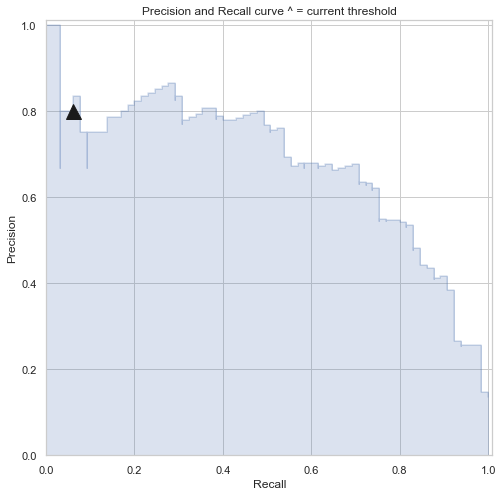

In [57]:
precision_recall_threshold(p, r, thresholds, t=0.79)


     pred_neg  pred_pos
neg       414         1
pos        63         2


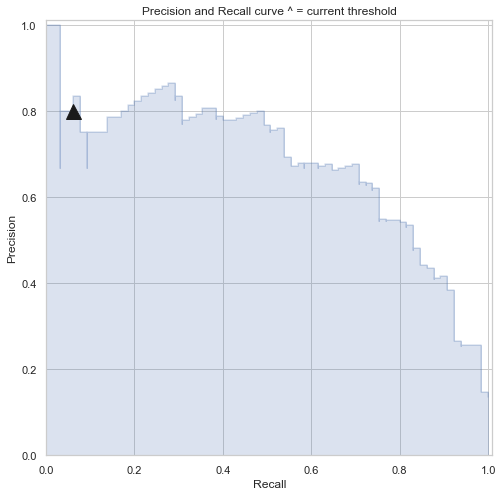

In [58]:
precision_recall_threshold(p, r, thresholds, t=0.80)


In [59]:

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold, label):
    adjusted_y_pred = adjusted_classes(RF_y_pred, t=threshold) 
    print('F1 Score: ', metrics.f1_score(y_test, adjusted_y_pred, pos_label= label))
    print(metrics.classification_report(y_test, adjusted_y_pred))
    adjusted_y_pred = adjusted_classes(RF_y_pred, t=threshold)
    print(metrics.confusion_matrix(y_test, adjusted_y_pred))

In [123]:
# Default Threshold
evaluate_threshold(.78, 1)


F1 Score:  0.1142857142857143
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       415
           1       0.80      0.06      0.11        65

    accuracy                           0.87       480
   macro avg       0.84      0.53      0.52       480
weighted avg       0.86      0.87      0.82       480

[[414   1]
 [ 61   4]]


Average precision score: 0.68


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.68')

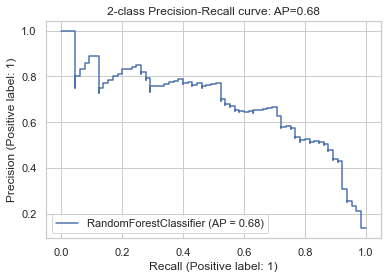

In [55]:
# Calculate the average precision score from predictions based on the best model and generate a precision-recall curve

RF_y_pred = RF.predict_proba(X_test)[:,1]
average_precision = average_precision_score(y_test, RF_y_pred)

print('Average precision score: {0:0.2f}'.format(
      average_precision))
disp = plot_precision_recall_curve(RF, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

# Reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-rec

# Business Scenario One: Precision vs Recall


For the red wine classification, the appropriate solution would be not to have any of the low rated wines to be wrongly classified as the top rated one. On the other hand it would be fine if there are a few top rated wines that get misclassified as a low or medium rated wine. In that sense, the precision of the classification model for the positive class which in this case is the class 1 should be high. Precision and recall have a tradeoff and increasing one reduces the other. Hence a wiser choice of the decision threshold would be the key in this problem

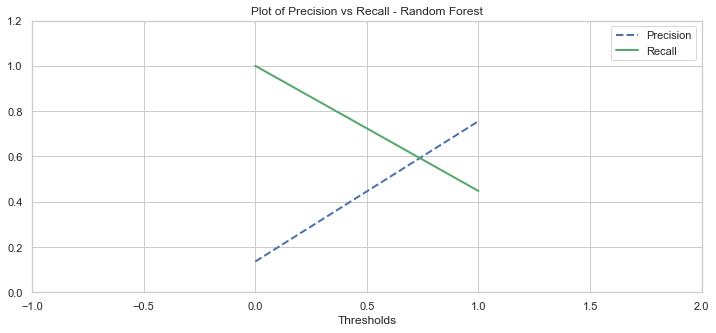

In [56]:


#get the predicted values based on the cross validation on the training data on 5 folds
y_train_scores = cross_val_predict(RF,X_train,y_train,cv=5)
#retrieve the precision,recall and the threshold values
from sklearn.metrics import precision_recall_curve
precisions ,recalls, thresholds = precision_recall_curve(y_train,y_train_scores)
#plot the precision recall curve
def plot_precision_recall_curve(precisions,recalls,thresholds):
    plt.figure(figsize=(12,5))
    plt.plot(thresholds,precisions[:-1],'b--',label='Precision',linewidth=2)
    plt.plot(thresholds,recalls[:-1],'g-',label='Recall',linewidth=2)
    plt.axis([-1,2,0,1.2])
    plt.title('Plot of Precision vs Recall - Random Forest')
    plt.legend()
    plt.grid()
    plt.xlabel('Thresholds')
#plot the precision vs the recall curve with threshold
plot_precision_recall_curve(precisions,recalls,thresholds)
plt.grid()
plt.show()

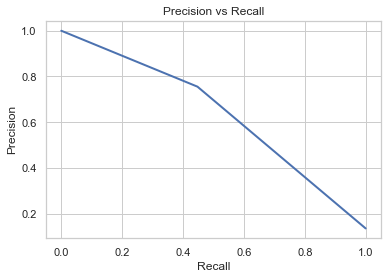

In [57]:
#Precision vs recall
plt.plot(recalls,precisions,'b-',linewidth=2)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision vs Recall')
plt.grid(visible=True)
plt.show()


In [58]:
recall_max_precision = recalls[np.argmax(precisions >= 0.5)]
recall_max_precision

0.4473684210526316

In [59]:
#select the threshold value which will give highest precision score
threshold_max_precision = thresholds[np.argmax(precisions >= 0.5)]
print('Threshold value to use to improve the precision to maximum as depicted in the graph')
print(f'Recommended Threshold Value:{threshold_max_precision}')

Threshold value to use to improve the precision to maximum as depicted in the graph
Recommended Threshold Value:1


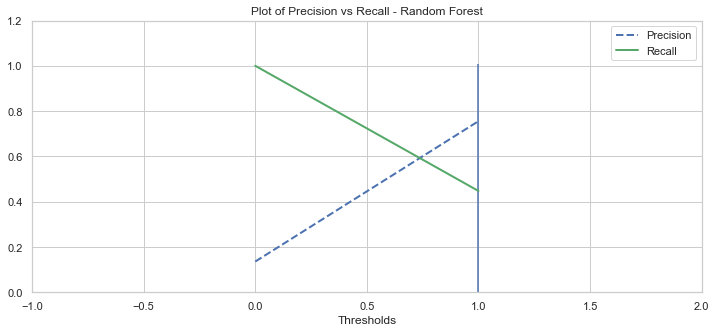

In [60]:
#replot the precision recall curve with the threshold value clearly shown
plot_precision_recall_curve(precisions,recalls,thresholds)
plt.vlines(x=threshold_max_precision,ymin=0,ymax=1.01)
plt.grid(visible=True)
plt.show()

In [84]:
#adjusting the predictions based on the threshold to increase the recall score
for i in range(len(X_train)):
    if y_train_scores[i] <= threshold_max_precision:
        RF.predict(X_train)[i] = 0
    else:
        RF.predict(X_train)[i] = 1

In [62]:
print('Classification Report - Train Data [Adjusting for higher precision]')
print('Note - Precision has increased to near max for class label 1')
print('\n')
print(classification_report(y_train,RF.predict(X_train)))
print(confusion_matrix(y_train,RF.predict(X_train)))

Classification Report - Train Data [Adjusting for higher precision]
Note - Precision has increased to near max for class label 1


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       967
           1       1.00      1.00      1.00       152

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

[[967   0]
 [  0 152]]


In [63]:
#predict the label for the test dataset -- > retrieve the decision score using the model


In [86]:
#adjusting the predictions based on the threshold decided during training with␣training data
for i in range(len(X_test)):
    if y_test_scores[i] <= threshold_max_precision:
        RF.predict(X_test)[i] = 0
    else:
        RF.predict(X_test)[i] = 1

In [87]:
print('Classification Report - Test Data')
print('Note - Precision has increased to maximum')
print('\n')
print(classification_report(y_test, RF.predict(X_test)))
print(confusion_matrix(y_test, RF.predict(X_test)))

Classification Report - Test Data
Note - Precision has increased to maximum


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       415
           1       0.76      0.49      0.60        65

    accuracy                           0.91       480
   macro avg       0.84      0.73      0.77       480
weighted avg       0.90      0.91      0.90       480

[[405  10]
 [ 33  32]]


# Business Scenario Two: Maximizing accuracy by minizing False positives and False negatives


In [65]:
# Adjust class predictions based on the prediction threshold (t)

def adjusted_classes(RF_y_pred, t):
    
    return [1 if y >= t else 0 for y in RF_y_pred]

# Reference: https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
# Reference: https://github.com/sdesaidata/Springboard/blob/master/Capstone1_Beer_Rating_Predictor/MachineLearning.ipynb

In [66]:
# Calculate accuracy score based on the default threshold = 0.5

accuracy_score(y_test, RF_y_pred_binary)

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

0.9104166666666667

In [67]:
# Calculate balanced accuracy score based on the default threshold = 0.5

balanced_accuracy_score(y_test, RF_y_pred_binary)

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

0.7341056533827619

In [68]:
# Generate an array of High quality probability scores for each wine

RF_y_pred = RF.predict_proba(X_test)[:,1]

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba

In [85]:
# Identify the threshold associated with the largest accuracy score

# Initialize an empty list to store accuracy scores
accuracy_points = []
# Define the starting largest score
largest_score = 0

# Loop through the array of theshold values to test
for t in thresholds:
    # Assign new classes based on the new threshold
    adjusted_y_pred = adjusted_classes(RF_y_pred, t=t)
    # Calculate the new accuracy score based on the new assignments for the new threshold
    new_balance = accuracy_score(y_test, adjusted_y_pred)
    # Append the new accuracy score to the list
    accuracy_points.append(new_balance)
    # Determine if the new accuracy score is the largest, and if so assign the score and threshold
    if new_balance > largest_score:
        largest_score = new_balance
        thresh = t
        #print(largest_score,thresh)
print("The largest Accuracy Score of",round((largest_score),4),"occurs at a threshold value of:",thresh)    
        
# Reference: https://github.com/sdesaidata/Springboard/blob/master/Capstone1_Beer_Rating_Predictor/MachineLearning.ipynb     

The largest Accuracy Score of 0.9146 occurs at a threshold value of: 0.38


In [86]:
# Identify the threshold associated with the largest balanced accuracy score

# Initialize an empty list to store balanced accuracy scores
balanced_accuracy_points = []
# Define the starting largest score
largest_score = 0

# Loop through the array of theshold values to test
for t in thresholds:
    # Assign new classes based on the new threshold
    adjusted_y_pred = adjusted_classes(RF_y_pred, t=t)
    # Calculate the new accuracy score based on the new assignments for the new threshold
    new_balance = balanced_accuracy_score(y_test, adjusted_y_pred)
    # Append the new accuracy score to the list
    balanced_accuracy_points.append(new_balance)
    # Determine if the new accuracy score is the largest, and if so assign the score and threshold
    if new_balance > largest_score:
        largest_score = new_balance
        thresh = t
        #print(largest_score,thresh)
print("The largest Balanced Accuracy Score of",round((largest_score),4),"occurs at a threshold value of:",thresh)   

# Reference: https://github.com/sdesaidata/Springboard/blob/master/Capstone1_Beer_Rating_Predictor/MachineLearning.ipynb        
            

The largest Balanced Accuracy Score of 0.8588 occurs at a threshold value of: 0.26


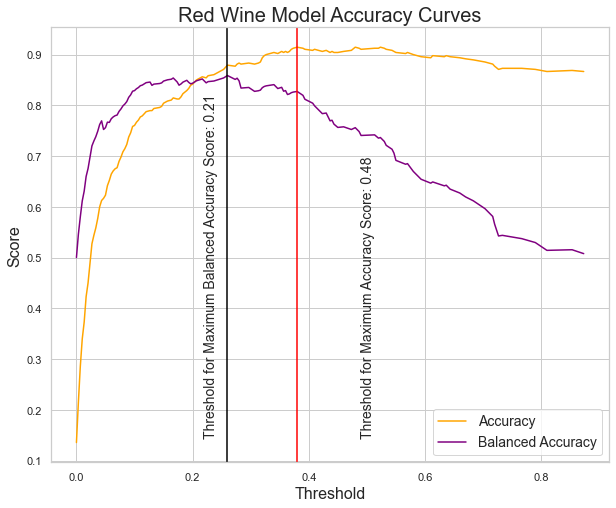

In [124]:
# Generate a figure showing variation in accuracy and balanced accuracy along with threshold values

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
plt.plot(thresholds, accuracy_points, color='orange', label = 'Accuracy')
plt.plot(thresholds, balanced_accuracy_points, color='purple', label = "Balanced Accuracy")
plt.title('Red Wine Model Accuracy Curves', fontsize =20)
plt.legend(('Accuracy', 'Balanced Accuracy'))
plt.xlabel('Threshold', fontsize = 16)
plt.axvline(x=.38, color='red') # check for value
plt.text(.49,.15,'Threshold for Maximum Accuracy Score: 0.48',rotation=90, fontsize = 14)
plt.axvline(x=.26, color='black') # check for value
plt.text(.22,.15,'Threshold for Maximum Balanced Accuracy Score: 0.21',rotation=90, fontsize=14)
plt.ylabel('Score', fontsize = 16)
plt.legend(loc='best', fontsize  = 14)
plt.savefig('accuracy_curves.png')
plt.show()

# Reference: https://github.com/sdesaidata/Springboard/blob/master/Capstone1_Beer_Rating_Predictor/MachineLearning.ipynb        

[[415   0]
 [ 64   1]]
Highest Accuracy:  0.8166666666666667


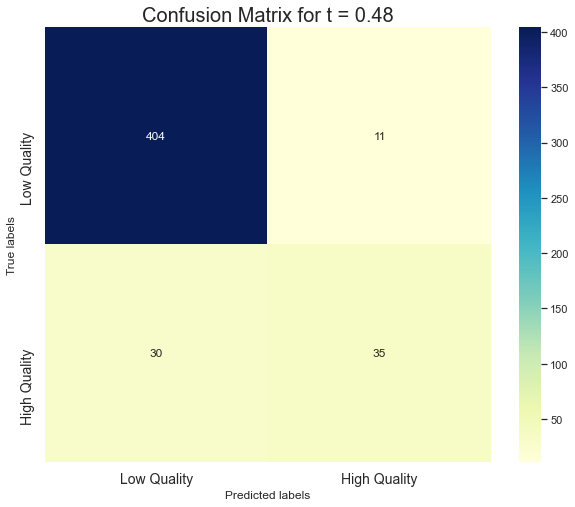

In [125]:

print(metrics.confusion_matrix(y_test, adjusted_y_pred),)

# Confusion matrix figure for the business application - complementing sentiment analysis     
print('Highest Accuracy: ', accuracy_points[48])
matrix_scenario_one = confusion_matrix(y_test, adjusted_classes(RF_y_pred, t=0.48))

plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(matrix_scenario_one, annot=True, ax = ax, fmt='g',cmap = 'YlGnBu'); # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix for t = 0.48', fontsize=20) 
ax.xaxis.set_ticklabels(['Low Quality', 'High Quality'], fontsize = 14) 
ax.yaxis.set_ticklabels(['Low Quality', 'High Quality'], fontsize = 14)
plt.savefig('cm_t58.png')

# Reference (sns heatmap): https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# Reference (sns heatmap): https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html





In [ ]:
print('\nHighest Balanced Accuracy: ', balanced_accuracy_points[21])

matrix_scenario_two = confusion_matrix(y_test, adjusted_classes(RF_y_pred, t=0.21))

plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(matrix_scenario_two, annot=True, ax = ax, fmt='g',cmap = 'YlGnBu'); # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix for t = 0.21', fontsize=20) 
ax.xaxis.set_ticklabels(['Low Quality', 'High Quality'], fontsize = 14) 
ax.yaxis.set_ticklabels(['Low Quality', 'High Quality'], fontsize = 14)
plt.savefig('cm_t58.png')

When applying the model on new alcohol with new feature data, you want the model to be as accurate as possible. To determine this I gauged the model using accuracy and confusion matrices. I wanted the least number of mispredictions (false negatives, false positives). The threshold level of .48 provides the best results with an accuary of .908. in total there are 41 mispredictions. 17 False Negatives and 24 False positives.

From a business perspective we would also want to limit the number of low quality wines predicted as high quality as we want to avoid producing low quality wines. If we have a high quality wine that is predicted as low quality from our model, we can always cross reference the popularity of the wine that is already produced or similar wines of similar characteristics to see if we truly have a low quality wine.




# Optimizing for Fbeta 0.5

In [73]:
# Since we have a small positive class we want to optiimze for F1
# Generate an array of probability estimates for each wine being High Quality

RF_y_pred = RF.predict_proba(X_test)[:,1]

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.pr

In [79]:
# Identify the threshold associated with the largest fbeta score
 
# Initialize an empty list to store fbeta scores
fbeta_points = []
# Define the starting largest score
largest_score = 0

# Loop through the array of threshold values to test
for t in thresholds:
    # Assign new binary class based on the new threshold
    adjusted_y_pred_scenario_one = adjusted_classes(RF_y_pred, t=t)
    # Calculate the new recall score based on the new assignments for the new threshold
    #  beta >1 which favors recall and beta <1 favors precision
    new_balance = fbeta_score(y_test, adjusted_y_pred_scenario_one, average='micro', beta = 10) # 'micro' calculates metrics globally by counting the total true...
    #...positives, false negatives and false positives
    # Append the new precision score to the list
    fbeta_points.append(new_balance)
    # Determine if the new precision score is the largest, and if so assign the score and threshold
    if new_balance > largest_score:
        largest_score = new_balance
        thresh = t
        #print(largest_score,thresh)
print("The largest fbeta score of",round((largest_score),4),"occurs at a threshold value of:",thresh)    
        
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html?highlight=fbeta  

The largest fbeta score of 0.9146 occurs at a threshold value of: 0.38


In [97]:
# Classification Report for business scenario three

print("Classification Report for Business Scenario Three :\n",classification_report(y_test, adjusted_classes(RF_y_pred, t=.52))) 
print("Confusion Matrix for Business Scenario Three:\n",confusion_matrix(y_test, adjusted_classes(RF_y_pred, t=.52)))

Classification Report for Business Scenario Three :
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       415
           1       0.78      0.49      0.60        65

    accuracy                           0.91       480
   macro avg       0.85      0.74      0.78       480
weighted avg       0.91      0.91      0.90       480

Confusion Matrix for Business Scenario Three:
 [[406   9]
 [ 33  32]]


In [116]:
# Classification report for business scenario three 

report = classification_report(y_test, adjusted_classes(RF_y_pred, t=0.82),output_dict=True)
df = pd.DataFrame(report)
df

# Reference: https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

,0,1,accuracy,macro avg,weighted avg
precision,0.868201,1.000000,0.86875,0.934100,0.886049
recall,1.000000,0.030769,0.86875,0.515385,0.868750
f1-score,0.929451,0.059701,0.86875,0.494576,0.811673
support,415.000000,65.000000,0.86875,480.000000,480.000000


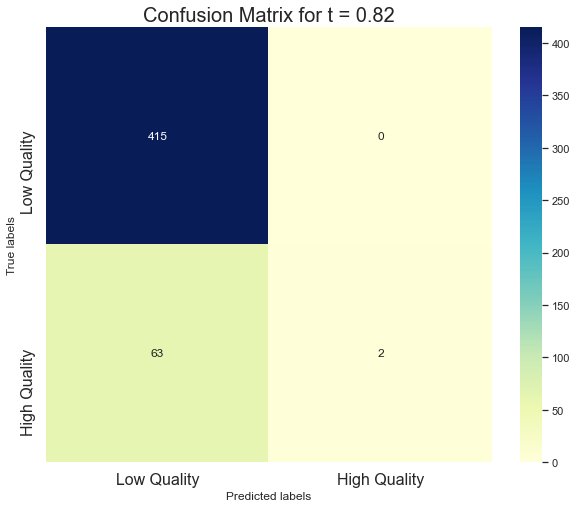

In [117]:
# Confusion matrix figure for business scenario three   

matrix_scenario_one = confusion_matrix(y_test, adjusted_classes(RF_y_pred, t=0.82), labels=[0, 1])

plt.figure(figsize=(10,8))
ax= plt.subplot()

sns.heatmap(matrix_scenario_one, annot=True, ax = ax, fmt='g',cmap = 'YlGnBu'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix for t = 0.82', fontsize=20) 
ax.xaxis.set_ticklabels(['Low Quality', 'High Quality'], fontsize = 16) 
ax.yaxis.set_ticklabels(['Low Quality', 'High Quality'], fontsize = 16)
plt.savefig('cm_t46.png')

# Reference (sns heatmap): https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# Reference (sns heatmap): https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

In [66]:
# Calculate the f1, recall and precision for the full range of threshold values: 0.0 - 1.0

# Initialize an empty list to store balanced accuracy scores
f1_scores = []
precision_scores = []
recall_scores = []

# Loop through the array of theshold values to test
for t in thresholds:
    
    # Assign new classes based on the new threshold
    adjusted_y_pred = adjusted_classes(RF_y_pred, t=t)
    
    # Calculate the new f1 score based on the new assignments for the new threshold
    new_f1_score = f1_score(y_test, adjusted_y_pred)
    # Append the new accuracy score to the list
    f1_scores.append(new_f1_score)
    
    # Calculate the new precision score based on the new assignments for the new threshold
    new_precision_score = precision_score(y_test, adjusted_y_pred)
    # Append the new accuracy score to the list
    precision_scores.append(new_precision_score)
    
    # Calculate the new recall score based on the new assignments for the new threshold
    new_recall_score = recall_score(y_test, adjusted_y_pred)
    # Append the new accuracy score to the list
    recall_scores.append(new_recall_score)

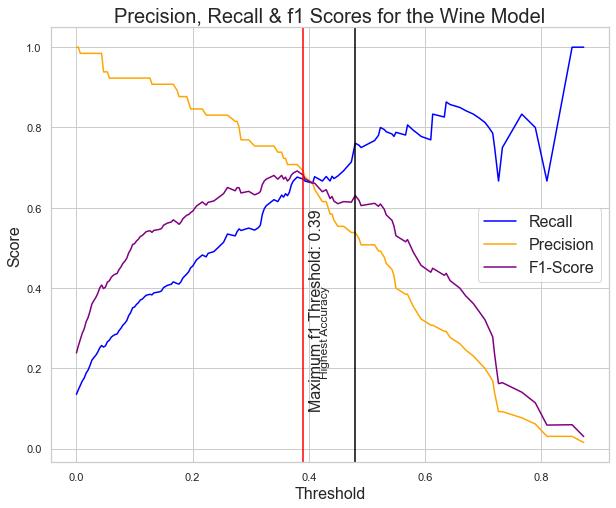

In [67]:
# Precision, Recall and F1 Score on a graph together for thresholds

plt.figure(figsize=(10,8))
plt.plot(thresholds, precision_scores, color='blue')
plt.plot(thresholds, recall_scores, color='orange')
plt.plot(thresholds, f1_scores, color='purple')
plt.title('Precision, Recall & f1 Scores for the Wine Model', fontsize=20)
plt.legend(('Recall','Precision', 'F1-Score'), loc='best', fontsize = 16)
plt.xlabel('Threshold', fontsize =16)
plt.ylabel('Score', fontsize =16)
plt.axvline(x=.39, color='red')
plt.text(.40,.1,'Maximum f1 Threshold: 0.39',rotation=90, fontsize = 16)
plt.axvline(x=.48, color='black')
plt.text(.42,.18,'Highest Accuracy',rotation=90, fontsize = 12)
#plt.axvline(x=.50, color='black')
#plt.text(.475,.18,'Default Threshold',rotation=90, fontsize = 12)
plt.savefig('max_f1_score.png')
plt.show()

# https://github.com/sdesaidata/Springboard/blob/master/Capstone1_Beer_Rating_Predictor/MachineLearning.ipynb

In [68]:
# Calculate the f1, recall and precision for the full range of threshold values: 0.0 - 1.0

# Initialize an empty list to store balanced accuracy scores
f1_scores = []
f05_scores = []
precision_scores = []
recall_scores = []

# Loop through the array of theshold values to test
for t in thresholds:
    
    # Assign new classes based on the new threshold
    adjusted_y_pred = adjusted_classes(RF_y_pred, t=t)
    
    # Calculate the new f1 score based on the new assignments for the new threshold
    new_f1_score = f1_score(y_test, adjusted_y_pred)
    # Append the new accuracy score to the list
    f1_scores.append(new_f1_score)
    
    # Calculate the new f0.5 score based on the new assignments for the new threshold
    f0_5 = fbeta_score(y_test, adjusted_y_pred, beta=0.5)
    # Append the new accuracy score to the list
    f05_scores.append(f0_5)
    
    
    # Calculate the new precision score based on the new assignments for the new threshold
    new_precision_score = precision_score(y_test, adjusted_y_pred)
    # Append the new accuracy score to the list
    precision_scores.append(new_precision_score)
    
    # Calculate the new recall score based on the new assignments for the new threshold
    new_recall_score = recall_score(y_test, adjusted_y_pred)
    # Append the new accuracy score to the list
    recall_scores.append(new_recall_score)

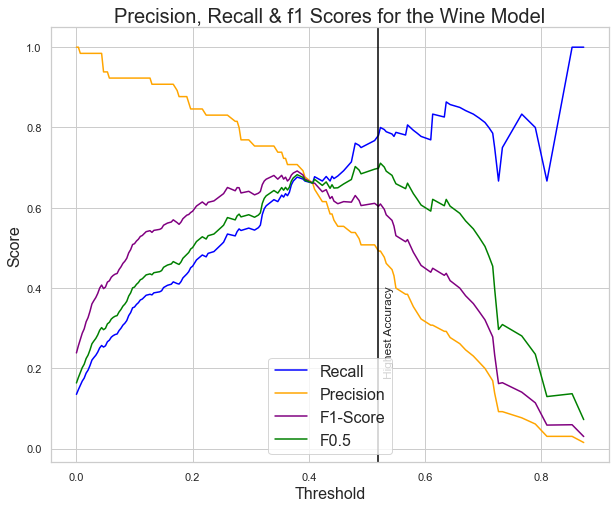

In [126]:
# Precision, Recall and F1 Score on a graph together for thresholds

plt.figure(figsize=(10,8))
plt.plot(thresholds, precision_scores, color='blue')
plt.plot(thresholds, recall_scores, color='orange')
plt.plot(thresholds, f1_scores, color='purple')
plt.plot(thresholds, f05_scores, color='green')
plt.title('Precision, Recall & f1 Scores for the Wine Model', fontsize=20)
plt.legend(('Recall','Precision', 'F1-Score', 'F0.5'), loc='best', fontsize = 16)
plt.xlabel('Threshold', fontsize =16)
plt.ylabel('Score', fontsize =16)
#plt.axvline(x=.39, color='red')
#plt.text(1,.1,'Maximum f1 Threshold: 0.39',rotation=90, fontsize = 16)
plt.axvline(x=.52, color='black')
plt.text(.53,.18,'Highest Accuracy',rotation=90, fontsize = 12)
#plt.axvline(x=.50, color='black')
#plt.text(.475,.18,'Default Threshold',rotation=90, fontsize = 12)
plt.savefig('max_f1_score.png')
plt.show()

# https://github.com/sdesaidata/Springboard/blob/master/Capstone1_Beer_Rating_Predictor/MachineLearning.ipynb